The purpose of this notebook is to answer the question: Why Bokeh? Why not Matplotlib pyplot?

In [3]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show
from bokeh.models import PanTool, WheelZoomTool, ResetTool, SaveTool, BoxZoomTool, TapTool, ZoomInTool, ZoomOutTool
from bokeh.io import output_notebook
import bokeh

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

print("Numpy version: ", np.__version__)
print("Bokeh version: ", bokeh.__version__)


Numpy version:  1.14.3
Bokeh version:  0.13.0


See https://bokeh.pydata.org/en/latest/docs/gallery/histogram.html for the original Bokeh version 1.13.0 source

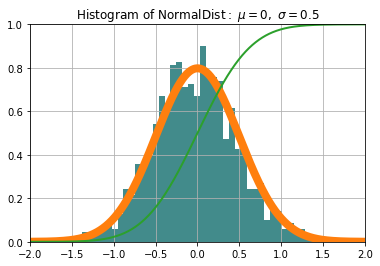

Loading BokehJS ...

In [9]:
# Example has been altered to use μ for mu, σ for sigma, θ for theta as variable names

### The world famous normal distribution
p1 = figure(title="Normal Distribution (μ=0, σ=0.5)",
            toolbar_location='left',
            toolbar_sticky=False,
            tools=[PanTool(), BoxZoomTool(), WheelZoomTool(),
                   TapTool(), ZoomInTool(), ZoomOutTool(),
                   ResetTool(), SaveTool()],
            background_fill_color="#E8DDCB")

μ, σ = 0, 0.5

measured = np.random.normal(μ, σ, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(-2, 2, 1000)
pdf = 1 / (σ * np.sqrt(2 * np.pi)) * np.exp(-(x - μ)**2 / (2 * σ**2))
cdf = (1 + scipy.special.erf((x-μ) / np.sqrt(2 * σ**2))) / 2

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564",
        line_color="#033649")
p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p1.legend.location = "center_right"
p1.legend.background_fill_color = "darkgrey"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'

### Now with matplotlib ###
n, bins, patches = plt.hist(measured, 50, density=1, facecolor="#036564", alpha=0.75)
l = plt.plot(x, pdf, linewidth=8, label='PDF')
l2 = plt.plot(x, cdf, linewidth=2, label='CDF')

plt.xlabel = 'x'
plt.ylabel = 'Pr(x)'
plt.title(r'$\mathrm{Histogram\ of\ Normal Dist:}\ \mu=0,\ \sigma=0.5$')
plt.axis([-2, 2, 0, 1])
plt.grid(True)

plt.show()

###############################################################################


p2 = figure(title="Log Normal Distribution (μ=0, σ=0.5)",
            toolbar_location='left',
            toolbar_sticky=False,
            tools=[PanTool(), BoxZoomTool(), WheelZoomTool(),
                   TapTool(), ZoomInTool(), ZoomOutTool(),
                   ResetTool(), SaveTool()],
            background_fill_color="#E8DDCB")

μ, σ = 0, 0.5

measured = np.random.lognormal(μ, σ, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8.0, 1000)
pdf = 1 / (x * σ * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - μ)**2 / (2 * σ**2))
cdf = (1 + scipy.special.erf((np.log(x) - μ)/(np.sqrt(2) * σ)))/2

p2.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564", line_color="#033649")
p2.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p2.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p2.legend.location = "center_right"
p2.legend.background_fill_color = "darkgrey"
p2.xaxis.axis_label = 'x'
p2.yaxis.axis_label = 'Pr(x)'


p3 = figure(title="Gamma Distribution (k=1, θ=2)",
            toolbar_location='left',
            toolbar_sticky=False,
            tools=[PanTool(), BoxZoomTool(), WheelZoomTool(),
                   TapTool(), ZoomInTool(), ZoomOutTool(),
                   ResetTool(), SaveTool()],
            background_fill_color="#E8DDCB")

k, θ = 1.0, 2.0

measured = np.random.gamma(k, θ, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 20.0, 1000)
pdf = x**(k - 1) * np.exp(-x / θ) / (θ**k * scipy.special.gamma(k))
cdf = scipy.special.gammainc(k, x / θ) / scipy.special.gamma(k)

p3.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
        fill_color="#036564",
        line_color="#033649")
p3.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p3.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p3.legend.location = "center_right"
p3.legend.background_fill_color = "darkgrey"
p3.xaxis.axis_label = 'x'
p3.yaxis.axis_label = 'Pr(x)'


p4 = figure(title="Weibull Distribution (λ=1, k=1.25)",
            toolbar_location='left',
            toolbar_sticky=False,
            tools=[PanTool(), BoxZoomTool(), WheelZoomTool(),
                   TapTool(), ZoomInTool(), ZoomOutTool(),
                   ResetTool(), SaveTool()],
            background_fill_color="#E8DDCB")

λ, k = 1, 1.25

measured = λ * (-np.log(np.random.uniform(0, 1, 1000)))**(1 / k)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8, 1000)
pdf = (k / λ) * (x / λ)**(k - 1) * np.exp(-(x / λ)**k)
cdf = 1 - np.exp(-(x / λ)**k)

p4.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")
p4.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
p4.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p4.legend.location = "center_right"
p4.legend.background_fill_color = "darkgrey"
p4.xaxis.axis_label = 'x'
p4.yaxis.axis_label = 'Pr(x)'

output_notebook()

show(gridplot(p1, p2, p3, p4, ncols=2, plot_width=400, plot_height=400))